In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
compras = pd.read_csv('bases_de_dados/base_compras.csv')
departamentos = pd.read_csv('bases_de_dados/base_departamentos.csv')
produtos = pd.read_csv('bases_de_dados/base_produtos.csv')
tipo_produto = pd.read_csv('bases_de_dados/base_tipo_de_produto.csv')

In [3]:
compras

,product_id,user_id,order_dow,order_hour_of_day
0,196,1,1,9
1,12427,1,1,9
2,48110,2,2,11
3,22474,2,2,11
4,16589,2,2,11
...,...,...,...,...
5262579,6846,206209,3,11
5262580,23594,206209,3,11
5262581,6187,206209,0,16
5262582,38167,206209,4,15


In [4]:
departamentos.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
produtos.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
tipo_produto.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


# Análise Exploratória

### Distribuição de compras por departamento

In [134]:
compras_produtos = pd.merge(compras, produtos, on = 'product_id', how = 'inner').drop(['product_name', 'aisle_id'], axis=1)

compras_dpt = pd.merge(compras_produtos, departamentos, on = 'department_id', how='inner').drop('department_id', axis=1)

vendas_dpt = compras_dpt.groupby('department')['product_id'].count().reset_index()
vendas_dpt = vendas_dpt.rename(columns = {'department': 'Departamento' ,'product_id': 'Total de Compras'})
vendas_dpt = vendas_dpt.sort_values('Total de Compras', ascending = False)
vendas_dpt.head()

,Departamento,Total de Compras
18,snacks,865910
3,beverages,808826
9,frozen,669837
15,pantry,562441
2,bakery,352665


In [186]:
total = vendas_dpt['Total de Compras'].sum()
porcentagem = [((valor/total) *100).round(2) for valor in vendas_dpt['Total de Compras']]
porcentagem

[16.45,
 15.37,
 12.73,
 10.69,
 6.7,
 6.1,
 5.99,
 4.93,
 4.22,
 4.05,
 4.04,
 2.55,
 2.41,
 1.53,
 0.87,
 0.56,
 0.39,
 0.21,
 0.2]

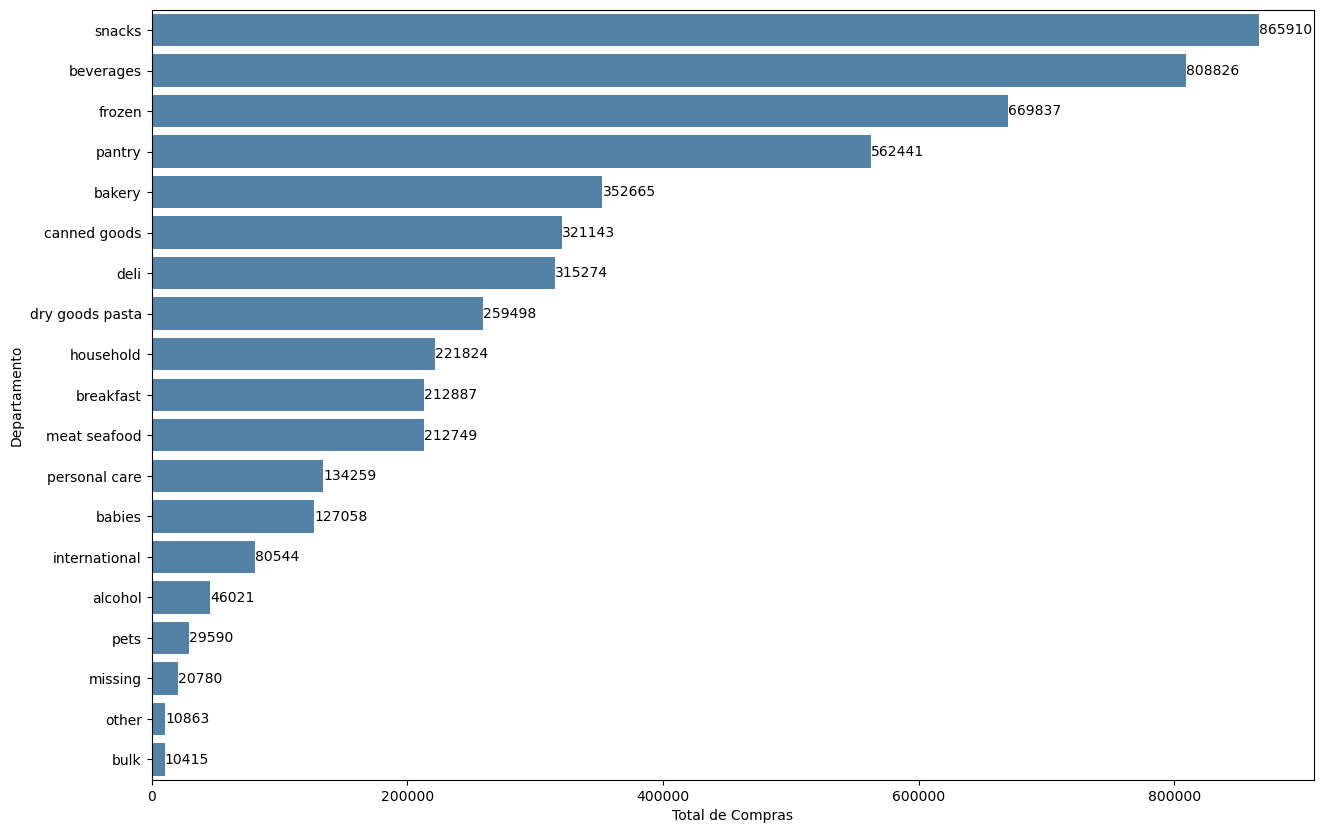

In [204]:
total = vendas_dpt['Total de Compras'].sum()
porcentagem = [((valor/total) *100).round(2) for valor in vendas_dpt['Total de Compras']]



plt.figure(figsize=(15,10))
ax = sns.barplot(data=vendas_dpt, y='Departamento', x='Total de Compras', color='steelblue');

ax.bar_label(ax.containers[0]);

### Distribuição de compras por dia da semana

In [194]:
# criando uma séria para os dias da semana
dias_semana = {0: 'Segunda-feira', 1:'Terça-feira', 2: 'Quarta-feira', 3:'Quinta-feira', 4: 'Sexta-feira', 5:'Sábado', 6:'Domingo'}

# mapeando os dias da semana no df de compras
compras1 = compras.copy()
compras1['dia_semana']=compras['order_dow'].map(dias_semana)

#agrupando o df de compras por dia da semana
compras_dia_semana = compras1.groupby('dia_semana')['product_id'].count().reset_index()
compras_dia_semana = compras_dia_semana.rename(columns = {'dia_semana':'Dia da semana', 'product_id':'Total de Compras'})
compras_dia_semana

,Dia da semana,Total de Compras
0,Domingo,728307
1,Quarta-feira,692418
2,Quinta-feira,639871
3,Segunda-feira,970190
4,Sexta-feira,629821
5,Sábado,694997
6,Terça-feira,906980


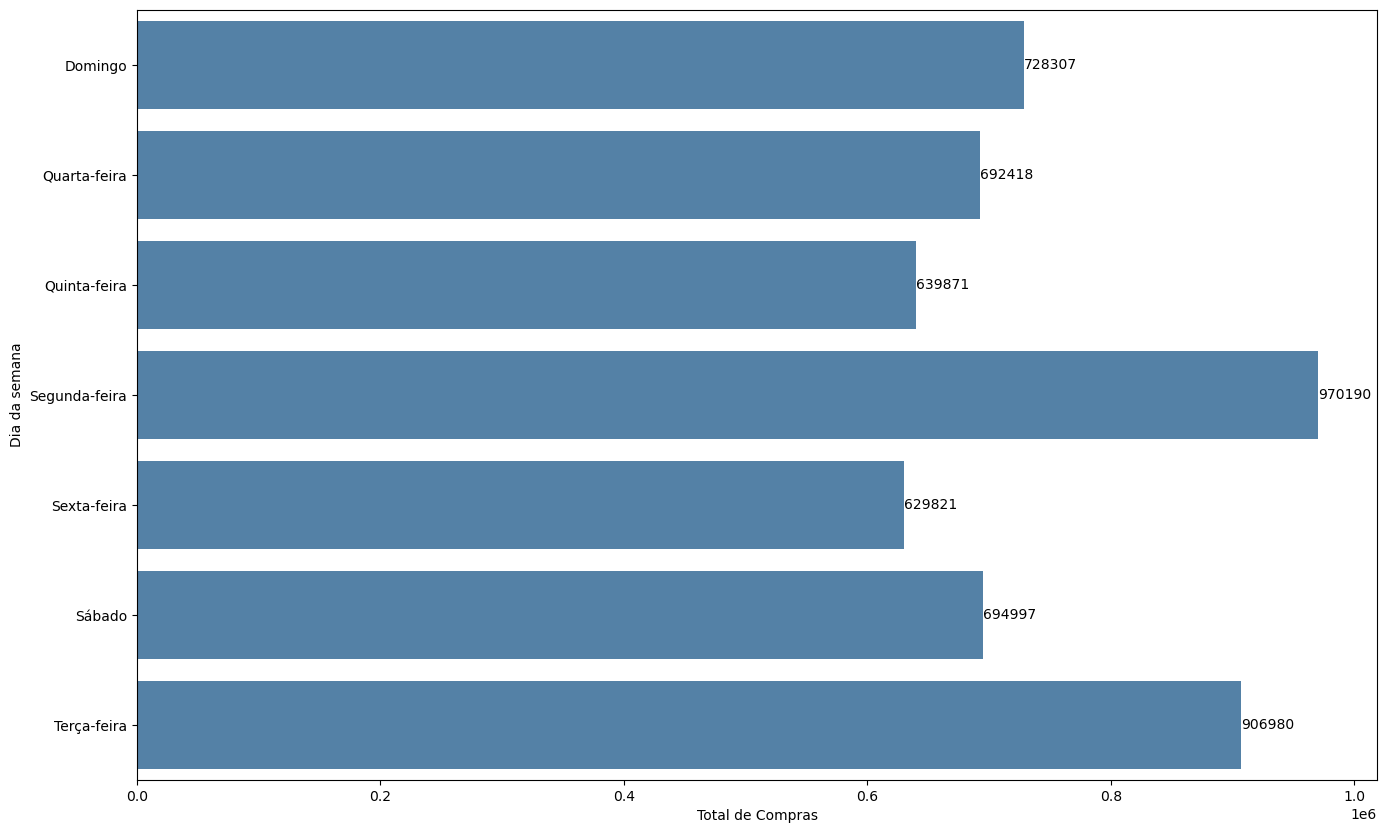

In [216]:
# plotando o grafico
plt.figure(figsize=(16,10))
ax = sns.barplot(data=compras_dia_semana, y='Dia da semana', x='Total de Compras',  color='steelblue');

ax.bar_label(ax.containers[0]);

### Distribuição de vendas por hora do dia

In [11]:
compras2 = compras.copy()

compras_hora = compras2.groupby('order_hour_of_day')['product_id'].count().reset_index()
compras_hora = compras_hora.rename(columns = {'order_hour_of_day': 'Hora do dia', 'product_id': 'Total de compras'})
compras_hora['Hora do dia'] = compras_hora['Hora do dia'].astype(str) 

compras_hora.head()

,Hora do dia,Total de compras
0,0,34664
1,1,19009
2,2,11513
3,3,8676
4,4,8969


<AxesSubplot:xlabel='Hora do dia', ylabel='Total de compras'>

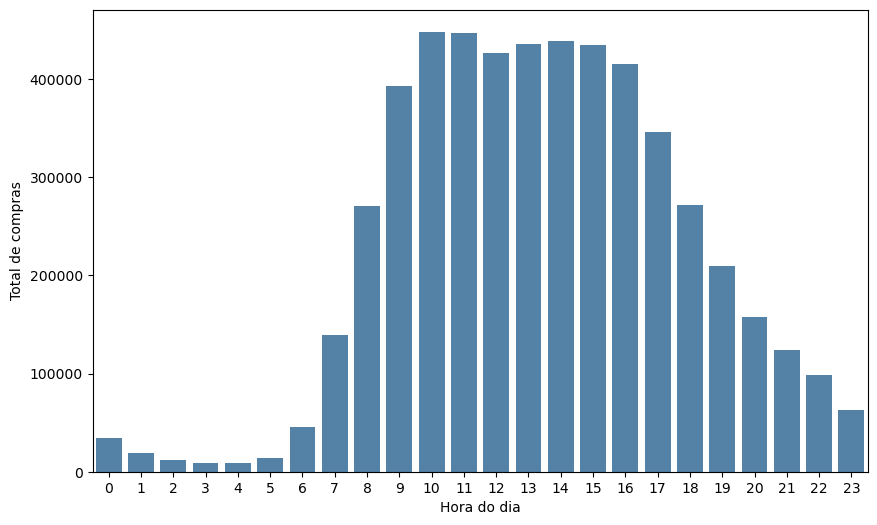

In [217]:
# plotando o grafico
plt.figure(figsize=(10,6))
sns.barplot(data=compras_hora, y='Total de compras', x='Hora do dia', color='steelblue')

## Ranking TOP 5 Produtos mais vendidos por departamento

In [13]:
compras_dpt

,product_id,user_id,order_dow,order_hour_of_day,department
0,196,1,1,9,beverages
1,196,15,2,16,beverages
2,196,15,1,10,beverages
3,196,19,6,12,beverages
4,196,19,4,17,beverages
...,...,...,...,...,...
5262579,28067,160932,3,20,bulk
5262580,28067,177874,0,14,bulk
5262581,28067,200640,6,18,bulk
5262582,28067,200640,6,20,bulk


In [14]:
compras_produtos1 = pd.merge(compras, produtos, on = 'product_id', how = 'inner')
produto_dpt = pd.merge(compras_produtos1, departamentos, on ='department_id', how='inner')
produto_dpt

,product_id,user_id,order_dow,order_hour_of_day,product_name,aisle_id,department_id,department
0,196,1,1,9,Soda,77,7,beverages
1,196,15,2,16,Soda,77,7,beverages
2,196,15,1,10,Soda,77,7,beverages
3,196,19,6,12,Soda,77,7,beverages
4,196,19,4,17,Soda,77,7,beverages
...,...,...,...,...,...,...,...,...
5262579,28067,160932,3,20,Organic Honey Lavender Granola,68,10,bulk
5262580,28067,177874,0,14,Organic Honey Lavender Granola,68,10,bulk
5262581,28067,200640,6,18,Organic Honey Lavender Granola,68,10,bulk
5262582,28067,200640,6,20,Organic Honey Lavender Granola,68,10,bulk


In [15]:
produto_dpt1 = produto_dpt.groupby(['department','product_name'])['product_id'].count().reset_index()
produto_dpt1 = produto_dpt1.rename(columns = {'department': 'Departamento', 'product_name':'Nome do Produto', 'product_id': 'Total de Compras'})
produto_dpt1.dtypes

Departamento        object
Nome do Produto     object
Total de Compras     int64
dtype: object

In [16]:
produto_dpt3 = pd.DataFrame()
for i in produto_dpt1['Departamento'].unique():
    produto_dpt2 = produto_dpt1[produto_dpt1['Departamento'] == '{}'.format(i)].sort_values('Total de Compras',ascending=False).reset_index(drop=True)
    produto_dpt2['Frequencia Relativa'] = (produto_dpt2['Total de Compras']/produto_dpt2['Total de Compras'].sum()*100).round(2)
    produto_dpt2['Frequencia Acumulada'] = produto_dpt2['Frequencia Relativa'].cumsum()
    produto_dpt2 = produto_dpt2.loc[:4]
    produto_dpt3 = pd.concat([produto_dpt3,produto_dpt2])

produto_dpt3.head(11)

,Departamento,Nome do Produto,Total de Compras,Frequencia Relativa,Frequencia Acumulada
0,alcohol,Sauvignon Blanc,2466,5.36,5.36
1,alcohol,Cabernet Sauvignon,1842,4.00,9.36
2,alcohol,Chardonnay,1812,3.94,13.30
3,alcohol,Beer,1689,3.67,16.97
4,alcohol,Vodka,1638,3.56,20.53
0,babies,Baby Food Stage 2 Blueberry Pear & Purple Carrot,2641,2.08,2.08
1,babies,Spinach Peas & Pear Stage 2 Baby Food,2481,1.95,4.03
2,babies,Gluten Free SpongeBob Spinach Littles,2151,1.69,5.72
3,babies,Broccoli & Apple Stage 2 Baby Food,2056,1.62,7.34
4,babies,Free & Clear Unscented Baby Wipes,1942,1.53,8.87


In [17]:
produto_dpt3.groupby('Departamento')['Total de Compras'].sum().reset_index()

,Departamento,Total de Compras
0,alcohol,9447
1,babies,11271
2,bakery,39711
3,beverages,78065
4,breakfast,25331
5,bulk,7027
6,canned goods,40657
7,deli,57404
8,dry goods pasta,23839
9,frozen,52595


In [18]:
produto_dpt3.sort_values('Total de Compras', ascending = False)

,Departamento,Nome do Produto,Total de Compras,Frequencia Relativa,Frequencia Acumulada
0,beverages,Sparkling Water Grapefruit,22728,2.81,2.81
0,deli,Original Hummus,21537,6.83,6.83
0,bakery,100% Whole Wheat Bread,18097,5.13,5.13
1,beverages,Spring Water,16873,2.09,4.90
0,frozen,Blueberries,16673,2.49,2.49
...,...,...,...,...,...
3,pets,Double Duty Advanced Odor Control Clumping Cat...,396,1.34,6.46
2,other,93/7 Ground Beef,388,3.57,19.25
4,pets,24/7 Performance Cat Litter,325,1.10,7.56
3,other,Coconut Almond Granola,236,2.17,21.42


In [19]:
teste = produto_dpt.groupby(['product_id', 'product_name', 'order_hour_of_day'])['user_id'].count().reset_index()
teste = teste.sort_values('user_id', ascending=False)
teste

,product_id,product_name,order_hour_of_day,user_id
426895,44632,Sparkling Water Grapefruit,10,2174
426896,44632,Sparkling Water Grapefruit,11,2002
426899,44632,Sparkling Water Grapefruit,14,1991
426894,44632,Sparkling Water Grapefruit,9,1977
426900,44632,Sparkling Water Grapefruit,15,1943
...,...,...,...,...
346902,36281,Brick Oven Crust Three Meat Medley Pizza,16,1
346903,36282,Everything Flatbread Crisps,9,1
346904,36282,Everything Flatbread Crisps,10,1
171068,17904,Organic Ginger with Honey Dressing & Dip,10,1


## formatar data frame para o modelo apriori

In [ ]:
#%%time
#lista_dpt = [19,7 ,1 ,13,3 ,15,20,9 ,17,14,12,11,18,6 ,5 ,8 ,21,2 ,10]
#
#for i in lista_dpt:
#    # criando variaveis de filtro
#    variavel = 'dpt{}'.format(i)    
#    #dpts[variavel] = compras_produtos1[compras_produtos1['department_id'] == i]
#    globals()[variavel] = compras_produtos1[compras_produtos1['department_id'] == i]
#    
#    # criando variaveis de groupby
#    agrupamento =  globals()[variavel].groupby(['user_id','product_name'])['product_id'].count().reset_index()
#    nome_agrupamento = 'dpt_groupby{}'.format(i)    
#    globals()[nome_agrupamento] = agrupamento
#    
#    #criando variaveis de pivot
#    pivot = globals()[nome_agrupamento].pivot(index='user_id', columns = 'product_name', values='product_id')
#    nome_pivot = 'dpt_pivot{}'.format(i)
#    globals()[nome_pivot] = pivot
#    

In [128]:
departamentos

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [129]:
%%time
amostra = int(0.001 * len(compras_produtos1))
#compras_produtos2 = compras_produtos1.sample(amostra)
compras_produtos2 = compras_produtos1[compras_produtos1['department_id'] == 18] 
compras_produtos2 = compras_produtos2.groupby(['user_id','product_name'])['product_id'].count().reset_index()
compras_produtos2['product_id'] = 1
#compras_produtos2 = compras_produtos2[compras_produtos2['product_id'] > 1]
compras_produtos2 = compras_produtos2.pivot(index='user_id', columns = 'product_name', values='product_id')
compras_produtos2 = compras_produtos2.fillna(0)

compras_produtos2

Wall time: 1.07 s


product_name,1F Organic Apples Organic Purees Fruit,1F Organic Bananas Organic Purees Fruit,1F Organic Mixed Carrots Organic Purees Vegetable,1F Organic Oatmeal Cereal Organic Cereal,1pk 270ct Refill,1st Foods Applesauce Baby Food,1st Foods Baby Food- Pears,1st Foods Bananas Baby Food,1st Foods Green Beans,1st Foods Peaches,...,Yellow Rice & Chicken with Vegetables in Sauce with Green Beans & Carrots,YoTot Apple Sweet Potato with Fruit & Veggies Organic Whole Milk Shutterfly Promo Organic Yogurt,Yogurt Blends Apple Cinnamon,Yogurt Blends Sweet Potato Pear,"Yogurt, Banana and Mixed Berry Blend Breakfast On-The-Go","Yum-A-Roo's Organic Toddler Snacks Pea, Banana, & Pineapple","Yum-a-roo's Organic Toddler Snacks Banana, Mango & Pineapple",Zucchini Banana & Amaranth Organic Baby Food,"Zucchini, Spinach & Banana Blend Veggies On-The-Go Stage 2 (6 Months and Up)",in Gravy with Carrots Peas & Corn Mashed Potatoes & Meatloaf Nuggets
user_id,,,,,,,,,,,,,,,,,,,,,
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
%%time

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
    
    
compra_set = compras_produtos2.applymap(encode_units)
compra_set.head()

Wall time: 2min 24s


product_name,1/4 Pound Burgers,100 Calorie Vanilla Ice Cream Bar,100 Calorie Variety Pack Ice Cream Bar,100% Apple Juice Concentrate,100% Beef Jalapeno Cheeseburgers,100% Grape Juice Concentrate,100% Juice Cranberry Blend Frozen Concentrate,100% Plant Protein Beastley Sliders,100% Pure Beef Homestyle Patties,100% Vegetarian Burgers Grillers Prime,...,Ziti & Meatballs,Ziti Bolognese Pasta Bowl,Zucchini Soufflé,"\""Im Pei-nut Butter\"" Double Chocolate Cookie & Peanut Butter Ice Cream","\""Louis Ba-Kahn\"" Chocolate Chip Cookie & Brown Butter Candied Bacon Ice Cream Sandwich","\""Mies Vanilla Rohe\"" Ice Cream Bars",gelato Coffee Toffee,with Mac & Cheese Fish Sticks,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
frequent_items = apriori(compras_produtos2, min_support=0.01, use_colnames=True)
frequent_items

C:\Users\Ben-Hur\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.013064,(Apple Peach Oatmeal Stage 2)
1,0.011420,(Apple Puffs Finger Foods)
2,0.032400,(Apple and Carrot Stage 2 Baby Food)
3,0.013756,(Apples & Blueberries Stage 2 Baby Food)
4,0.021413,(Apples + Strawberries Organic Nibbly Fingers)
...,...,...
111,0.019207,"(Spinach Peas & Pear Stage 2 Baby Food, Brocco..."
112,0.012761,"(Gluten Free SpongeBob Spinach Littles, Kids S..."
113,0.012069,"(Organic Strawberry Yogurt & Fruit Snack, Orga..."
114,0.011723,"(Organic Pears, Peas and Broccoli Puree Stage ..."


In [131]:
rules = association_rules(frequent_items, metric = 'confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Baby Food Stage 2 Blueberry Pear & Purple Car...,(Apple and Carrot Stage 2 Baby Food),0.065277,0.032400,0.011723,0.179589,5.542806,0.009608,1.179409,0.876822
1,(Apple and Carrot Stage 2 Baby Food),(Baby Food Stage 2 Blueberry Pear & Purple Car...,0.032400,0.065277,0.011723,0.361816,5.542806,0.009608,1.464661,0.847030
2,(Spinach Peas & Pear Stage 2 Baby Food),(Apple and Carrot Stage 2 Baby Food),0.062076,0.032400,0.010295,0.165854,5.118877,0.008284,1.159988,0.857899
3,(Apple and Carrot Stage 2 Baby Food),(Spinach Peas & Pear Stage 2 Baby Food),0.032400,0.062076,0.010295,0.317757,5.118877,0.008284,1.374766,0.831588
4,(Baby Food Stage 2 Blueberry Pear & Purple Car...,(Baby Food Stage 2 Pumpkin Banana),0.065277,0.033525,0.010728,0.164347,4.902213,0.008540,1.156551,0.851600
5,(Baby Food Stage 2 Pumpkin Banana),(Baby Food Stage 2 Blueberry Pear & Purple Car...,0.033525,0.065277,0.010728,0.320000,4.902213,0.008540,1.374593,0.823623
6,(Baby Food Stage 2 Blueberry Pear & Purple Car...,(Broccoli & Apple Stage 2 Baby Food),0.065277,0.052818,0.015659,0.239894,4.541875,0.012212,1.246118,0.834286
7,(Broccoli & Apple Stage 2 Baby Food),(Baby Food Stage 2 Blueberry Pear & Purple Car...,0.052818,0.065277,0.015659,0.296478,4.541875,0.012212,1.328635,0.823313
8,(Baby Food Stage 2 Blueberry Pear & Purple Car...,"(Peach, Apricot & Banana Stage 2 Baby Food)",0.065277,0.040490,0.013194,0.202121,4.991904,0.010551,1.202576,0.855521
9,"(Peach, Apricot & Banana Stage 2 Baby Food)",(Baby Food Stage 2 Blueberry Pear & Purple Car...,0.040490,0.065277,0.013194,0.325855,4.991904,0.010551,1.386531,0.833421


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [132]:
rules.to_excel('rules_snacks.xlsx', index=False)